In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset

import scipy.io as sio

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


In [3]:
def box_rmse(sshm, ssho, milon, malon, milat, malat, *args):
    
    # latn, latnb, sshm, ssho, milon, malon, milat, malat
    if args: #len(args) == 8:
        b1 = np.where(latn == latnb[milat, milon])   
        b3 = np.where(latn == latnb[malat, malon])

        data = sshm[b3[0]:b1[0], b1[1]:b3[1]]
        esti = ssho[b3[0]:b1[0], b1[1]:b3[1]]

    elif not args: #len(args) == 6:
        data = SSH_modelnb[milat:malat, milon:malon]
        esti = SSH_obsnb[milat:malat, milon:malon]
    
    else:
        print('Missing inputs')
    rmsE = sqrt( sum( (data.ravel() - esti.ravel())**2) / size(data) )
    print(rmsE)
    

In [4]:
def load_filt_ssh(mx):
    ssh_r_LDx = m['ssh_r_LD']
    sshm_LD1 = mx['sshm_LD1']
    sshm_LD2 = mx['sshm_LD2']
    ssho_LD1 = mx['ssho_LD1']
    ssho_LD2 = mx['ssho_LD2']

    sshm_LDx = np.concatenate((sshm_LD1, sshm_LD2), axis=0)
    ssho_LDx = np.concatenate((ssho_LD1, ssho_LD2), axis=0)
    
    return ssh_r_LDx, sshm_LDx, ssho_LDx

# Parameters:

In [5]:
box_p015 = [4., 6., 37., 39.]
box_p168 = [3.1, 5.1, 37.6, 39.6]

In [6]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Loading the data:

In [7]:
directory = '/Users/laura/Documents/scripts/IMEDEA/data/'

### Box 1, pass 15:

* SWOT non - filtered:

In [8]:
lonnb = np.load(directory + 'new_cutoffs/DEF/lonnb_p015_nofilt')
latnb = np.load(directory + 'new_cutoffs/DEF/latnb_p015_nofilt')
SSH_modelnb = np.load(directory + 'new_cutoffs/DEF/SSH_modelnb_p015_nofilt')
SSH_obsnb = np.load(directory + 'new_cutoffs/DEF/SSH_obsnb_p015_nofilt')
am = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_nofilt')
ao = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_nofilt')
rb_m = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_nofilt')
rb_o = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_nofilt')


# Mask vel. and. vort.:

In [9]:
am[:, 25:36] = ma.masked
ao[:, 25:36] = ma.masked
rb_m[:, 24:37] = ma.masked
rb_o[:, 24:37] = ma.masked

* Filtered variables:

    - Lon and lat:

In [10]:
lon_v = np.load(directory + 'new_cutoffs/DEF/lon_p015_velvort_filt')
lat_v = np.load(directory + 'new_cutoffs/DEF/lat_p015_velvort_filt')

    - SSH:

In [11]:
# 16
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_16_72_v1_new_DEF1.mat')
ssh_r_LD16, sshm_LD16, ssho_LD16 = load_filt_ssh(m)

# 23
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_23_95_v1_new_DEF1.mat')
ssh_r_LD23, sshm_LD23, ssho_LD23 = load_filt_ssh(m)

# 30
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_30_v1_new_DEF1.mat')
ssh_r_LD30, sshm_LD30, ssho_LD30 = load_filt_ssh(m)

# 33
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_33_85_v1_new_DEF1.mat')
ssh_r_LD33, sshm_LD33, ssho_LD33 = load_filt_ssh(m)

# 37
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_37_58_v1_new_DEF1.mat')
ssh_r_LD37, sshm_LD37, ssho_LD37 = load_filt_ssh(m)

# 40
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_41_38_v1_new_DEF1.mat')
ssh_r_LD40, sshm_LD40, ssho_LD40 = load_filt_ssh(m)

# 45
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_45_02_v1_new_DEF1.mat')
ssh_r_LD45, sshm_LD45, ssho_LD45 = load_filt_ssh(m)

# 48
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_48_19_v1_new_DEF1.mat')
ssh_r_LD48, sshm_LD48, ssho_LD48 = load_filt_ssh(m)

# 50
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_50_58_v1_new_DEF1.mat')
ssh_r_LD50, sshm_LD50, ssho_LD50 = load_filt_ssh(m)

# 53
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_53_20_v1_new_DEF1.mat')
ssh_r_LD53, sshm_LD53, ssho_LD53 = load_filt_ssh(m)

# 56
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_56_12_v1_new_DEF1.mat')
ssh_r_LD56, sshm_LD56, ssho_LD56 = load_filt_ssh(m)

# 57
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_57_70_v1_new_DEF1.mat')
ssh_r_LD57, sshm_LD57, ssho_LD57 = load_filt_ssh(m)

# 60
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_60_v1_new_DEF1.mat')
ssh_r_LD60, sshm_LD60, ssho_LD60 = load_filt_ssh(m)

# 63
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_63_03_v1_new_DEF1.mat')
ssh_r_LD63, sshm_LD63, ssho_LD63 = load_filt_ssh(m)

# 65
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_65_03_v1_new_DEF1.mat')
ssh_r_LD65, sshm_LD65, ssho_LD65 = load_filt_ssh(m)

# 67
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_67_17_v1_new_DEF1.mat')
ssh_r_LD67, sshm_LD67, ssho_LD67 = load_filt_ssh(m)

# 100
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_100_v1_new_DEF1.mat')
ssh_r_LD100, sshm_LD100, ssho_LD100 = load_filt_ssh(m)

# 200
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_195_49_v1_new_DEF1.mat')
ssh_r_LD200, sshm_LD200, ssho_LD200 = load_filt_ssh(m)


In [12]:
mbox = sio.loadmat('/Users/laura/Documents/scripts/IMEDEA/data/3739box_DEF.mat')
lon_sat = mbox['lonobox']
lat_sat = mbox['latobox']
lono_ssh = np.delete(lon_sat, (26), axis=0)
lato_ssh = np.delete(lat_sat, (26), axis=0)

    - absvel and rel. vort. data:

In [13]:
# 16 km
am16 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD16')
ao16 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD16')
ar16 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD16')
vm16 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD16')
vo16 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD16')
vr16 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD16')
am16[:,25:36] = ma.masked
ao16[:,25:36] = ma.masked
vm16[:,24:37] = ma.masked
vo16[:,24:37] = ma.masked
vm16[abs(vm16) > 10.] = ma.masked
vo16[abs(vo16) > 10.] = ma.masked

# 23 km
am23 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD23')
ao23 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD23')
ar23 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD23')
vm23 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD23')
vo23 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD23')
vr23 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD23')
am23[:,25:36] = ma.masked
ao23[:,25:36] = ma.masked
vm23[:,24:37] = ma.masked
vo23[:,24:37] = ma.masked
vm23[abs(vm23) > 10.] = ma.masked
vo23[abs(vo23) > 10.] = ma.masked

# 30 km
am30 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD30')
ao30 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD30')
ar30 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD30')
vm30 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD30')
vo30 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD30')
vr30 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD30')
am30[:,25:36] = ma.masked
ao30[:,25:36] = ma.masked
vm30[:,24:37] = ma.masked
vo30[:,24:37] = ma.masked
vm30[abs(vm30) > 10.] = ma.masked
vo30[abs(vo30) > 10.] = ma.masked

# 33 km
am33 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD33')
ao33 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD33')
ar33 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD33')
vm33 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD33')
vo33 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD33')
vr33 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD33')
am33[:,25:36] = ma.masked
ao33[:,25:36] = ma.masked
vm33[:,24:37] = ma.masked
vo33[:,24:37] = ma.masked
vm33[abs(vm33) > 10.] = ma.masked
vo33[abs(vo33) > 10.] = ma.masked

# 37 km
am37 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD37')
ao37 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD37')
ar37 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD37')
vm37 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD37')
vo37 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD37')
vr37 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD37')
am37[:,25:36] = ma.masked
ao37[:,25:36] = ma.masked
vm37[:,24:37] = ma.masked
vo37[:,24:37] = ma.masked
vm37[abs(vm37) > 10.] = ma.masked
vo37[abs(vo37) > 10.] = ma.masked

# 40 km
am40 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD40')
ao40 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD40')
ar40 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD40')
vm40 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD40')
vo40 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD40')
vr40 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD40')
am40[:,25:36] = ma.masked
ao40[:,25:36] = ma.masked
vm40[:,24:37] = ma.masked
vo40[:,24:37] = ma.masked
vm40[abs(vm40) > 10.] = ma.masked
vo40[abs(vo40) > 10.] = ma.masked

# 45 km
am45 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD45')
ao45 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD45')
ar45 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD45')
vm45 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD45')
vo45 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD45')
vr45 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD45')
am45[:,25:36] = ma.masked
ao45[:,25:36] = ma.masked
vm45[:,24:37] = ma.masked
vo45[:,24:37] = ma.masked
vm45[abs(vm45) > 10.] = ma.masked
vo45[abs(vo45) > 10.] = ma.masked

# 48 km
am48 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD48')
ao48 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD48')
ar48 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD48')
vm48 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD48')
vo48 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD48')
vr48 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD48')
am48[:,25:36] = ma.masked
ao48[:,25:36] = ma.masked
vm48[:,24:37] = ma.masked
vo48[:,24:37] = ma.masked
vm48[abs(vm48) > 10.] = ma.masked
vo48[abs(vo48) > 10.] = ma.masked

# 50 km
am50 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD50')
ao50 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD50')
ar50 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD50')
vm50 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD50')
vo50 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD50')
vr50 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD50')
am50[:,25:36] = ma.masked
ao50[:,25:36] = ma.masked
vm50[:,24:37] = ma.masked
vo50[:,24:37] = ma.masked
vm50[abs(vm50) > 10.] = ma.masked
vo50[abs(vo50) > 10.] = ma.masked

# 53 km
am53 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD53')
ao53 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD53')
ar53 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD53')
vm53 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD53')
vo53 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD53')
vr53 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD53')
am53[:,25:36] = ma.masked
ao53[:,25:36] = ma.masked
vm53[:,24:37] = ma.masked
vo53[:,24:37] = ma.masked
vm53[abs(vm53) > 10.] = ma.masked
vo53[abs(vo53) > 10.] = ma.masked

# 56 km
am56 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD56')
ao56 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD56')
ar56 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD56')
vm56 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD56')
vo56 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD56')
vr56 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD56')
am56[:,25:36] = ma.masked
ao56[:,25:36] = ma.masked
vm56[:,24:37] = ma.masked
vo56[:,24:37] = ma.masked
vm56[abs(vm56) > 10.] = ma.masked
vo56[abs(vo56) > 10.] = ma.masked

# 57 km
am57 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD57')
ao57 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD57')
ar57 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD57')
vm57 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD57')
vo57 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD57')
vr57 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD57')
am57[:,25:36] = ma.masked
ao57[:,25:36] = ma.masked
vm57[:,24:37] = ma.masked
vo57[:,24:37] = ma.masked
vm57[abs(vm57) > 10.] = ma.masked
vo57[abs(vo57) > 10.] = ma.masked

# 60 km
am60 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD60')
ao60 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD60')
ar60 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD60')
vm60 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD60')
vo60 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD60')
vr60 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD60')
am60[:,25:36] = ma.masked
ao60[:,25:36] = ma.masked
vm60[:,24:37] = ma.masked
vo60[:,24:37] = ma.masked
vm60[abs(vm60) > 10.] = ma.masked
vo60[abs(vo60) > 10.] = ma.masked

# 63 km
am63 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD63')
ao63 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD63')
ar63 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD63')
vm63 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD63')
vo63 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD63')
vr63 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD63')
am63[:,25:36] = ma.masked
ao63[:,25:36] = ma.masked
vm63[:,24:37] = ma.masked
vo63[:,24:37] = ma.masked
vm63[abs(vm63) > 10.] = ma.masked
vo63[abs(vo63) > 10.] = ma.masked

# 65 km
am65 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD65')
ao65 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD65')
ar65 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD65')
vm65 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD65')
vo65 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD65')
vr65 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD65')
am65[:,25:36] = ma.masked
ao65[:,25:36] = ma.masked
vm65[:,24:37] = ma.masked
vo65[:,24:37] = ma.masked
vm65[abs(vm65) > 10.] = ma.masked
vo65[abs(vo65) > 10.] = ma.masked

# 67 km
am67 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD67')
ao67 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD67')
ar67 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD67')
vm67 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD67')
vo67 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD67')
vr67 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD67')
am67[:,25:36] = ma.masked
ao67[:,25:36] = ma.masked
vm67[:,24:37] = ma.masked
vo67[:,24:37] = ma.masked
vm67[abs(vm67) > 10.] = ma.masked
vo67[abs(vo67) > 10.] = ma.masked

# 100 km
am100 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD100')
ao100 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD100')
ar100 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD100')
vm100 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD100')
vo100 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD100')
vr100 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD100')
am100[:,25:36] = ma.masked
ao100[:,25:36] = ma.masked
vm100[:,24:37] = ma.masked
vo100[:,24:37] = ma.masked
vm100[abs(vm100) > 10.] = ma.masked
vo100[abs(vo100) > 10.] = ma.masked

# 200 km
am200 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p015_LD200')
ao200 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p015_LD200')
ar200 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p015_LD200')
vm200 = np.load(directory + 'new_cutoffs/DEF/rb_m_p015_LD200')
vo200 = np.load(directory + 'new_cutoffs/DEF/rb_o_p015_LD200')
vr200 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p015_LD200')
am200[:,25:36] = ma.masked
ao200[:,25:36] = ma.masked
vm200[:,24:37] = ma.masked
vo200[:,24:37] = ma.masked
vm200[abs(vm200) > 10.] = ma.masked
vo200[abs(vo200) > 10.] = ma.masked


# Modifications so all the same size when same variable:
(look at 2017-11-10_SWOT_remote_sensing_journal_version_RMSE_DEF_index_to_remove.ipynb for more info.)

In [14]:
# Less indidices to match filtered SSH:
SSH_model_R = np.delete(SSH_modelnb, [26,27,28,29,30,31,32,33,34], axis=1)
SSH_obs_R = np.delete(SSH_obsnb, [26,27,28,29,30,31,32,33,34], axis=1)

In [15]:
# Non-filtered vel and vort less indidices to mATch filtered vel and vort.
am_R = np.delete(am, (26), axis=1)
ao_R = np.delete(ao, (26), axis=1)
vm_R = np.delete(rb_m, (26), axis=1)
vo_R = np.delete(rb_o, (26), axis=1)

In [16]:
# Fill value to nan:
am_R[am_R.mask] = np.nan
ao_R[ao_R.mask] = np.nan
vm_R[vm_R.mask] = np.nan
vo_R[vo_R.mask] = np.nan

am16[am16.mask] = np.nan
ao16[ao16.mask] = np.nan
vm16[vm16.mask] = np.nan
vo16[vo16.mask] = np.nan

am23[am23.mask] = np.nan
ao23[ao23.mask] = np.nan
vm23[vm23.mask] = np.nan
vo23[vo23.mask] = np.nan

am30[am30.mask] = np.nan
ao30[ao30.mask] = np.nan
vm30[vm30.mask] = np.nan
vo30[vo30.mask] = np.nan

am33[am33.mask] = np.nan
ao33[ao33.mask] = np.nan
vm33[vm33.mask] = np.nan
vo33[vo33.mask] = np.nan

am37[am37.mask] = np.nan
ao37[ao37.mask] = np.nan
vm37[vm37.mask] = np.nan
vo37[vo37.mask] = np.nan

am40[am40.mask] = np.nan
ao40[ao40.mask] = np.nan
vm40[vm40.mask] = np.nan
vo40[vo40.mask] = np.nan

am45[am45.mask] = np.nan
ao45[ao45.mask] = np.nan
vm45[vm45.mask] = np.nan
vo45[vo45.mask] = np.nan

am48[am48.mask] = np.nan
ao48[ao48.mask] = np.nan
vm48[vm48.mask] = np.nan
vo48[vo48.mask] = np.nan

am50[am50.mask] = np.nan
ao50[ao50.mask] = np.nan
vm50[vm50.mask] = np.nan
vo50[vo50.mask] = np.nan

am53[am53.mask] = np.nan
ao53[ao53.mask] = np.nan
vm53[vm53.mask] = np.nan
vo53[vo53.mask] = np.nan

am56[am56.mask] = np.nan
ao56[ao56.mask] = np.nan
vm56[vm56.mask] = np.nan
vo56[vo56.mask] = np.nan

am57[am57.mask] = np.nan
ao57[ao57.mask] = np.nan
vm57[vm57.mask] = np.nan
vo57[vo57.mask] = np.nan

am60[am60.mask] = np.nan
ao60[ao60.mask] = np.nan
vm60[vm60.mask] = np.nan
vo60[vo60.mask] = np.nan

am63[am63.mask] = np.nan
ao63[ao63.mask] = np.nan
vm63[vm63.mask] = np.nan
vo63[vo63.mask] = np.nan

am65[am65.mask] = np.nan
ao65[ao65.mask] = np.nan
vm65[vm65.mask] = np.nan
vo65[vo65.mask] = np.nan

am67[am67.mask] = np.nan
ao67[ao67.mask] = np.nan
vm67[vm67.mask] = np.nan
vo67[vo67.mask] = np.nan

am100[am100.mask] = np.nan
ao100[ao100.mask] = np.nan
vm100[vm100.mask] = np.nan
vo100[vo100.mask] = np.nan

am200[am200.mask] = np.nan
ao200[ao200.mask] = np.nan
vm200[vm200.mask] = np.nan
vo200[vo200.mask] = np.nan

/Users/laura/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:3263: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  _data[indx] = dval


# RMSEs calculations:

In [17]:
wave_lengths = [0, 16.72, 23.95, 29.47, 33.85, 37.58, 41.38, 45.02, 48.19, 50.58, 53.2, 56.12, 57.7, 61.15, 63.03, 65.03, 67.17, 99.96, 195.49]

* ssh:

In [18]:
rmseR_sshp1_1ref_b1 = np.zeros((len(wave_lengths)))
data = SSH_model_R.T

esti = np.stack((SSH_obs_R.T, ssho_LD16, ssho_LD23, ssho_LD30, ssho_LD33, ssho_LD37, ssho_LD40, ssho_LD45, ssho_LD48, ssho_LD50, ssho_LD53, ssho_LD56, ssho_LD57, ssho_LD60, ssho_LD63, ssho_LD65, ssho_LD67, ssho_LD100, ssho_LD200))

for ii in xrange(0, len(wave_lengths)):
    rmseR_sshp1_1ref_b1[ii] = sqrt( np.nansum( (data.ravel() - esti[ii,:,:].ravel())**2) / size(data) )


* vel:

In [19]:
rmseR_vel_b1 = np.zeros((len(wave_lengths)))
data = am_R

esti = np.stack((ao_R, ao16, ao23, ao30, ao33, ao37, ao40, ao45, ao48, ao50, ao53, ao56, ao57, ao60, ao63, ao65, ao67, ao100, ao200))

for ii in xrange(0, len(wave_lengths)):
    rmseR_vel_b1[ii] = sqrt( np.nansum( (data.ravel() - esti[ii,:,:].ravel())**2) / size(data) )


* vort:

In [20]:
rmse_vor_b1 = np.zeros((len(wave_lengths)))
data = vm_R

esti = np.stack((vo_R, vo16, vo23, vo30, vo33, vo37, vo40, vo45, vo48, vo50, vo53, vo56, vo57, vo60, vo63, vo65, vo67, vo100, vo200))

for ii in xrange(0, len(wave_lengths)):
    rmse_vor_b1[ii] = sqrt( np.nansum( (data.ravel() - esti[ii,:,:].ravel())**2) / size(data) )


### Box 2, pass 168:

* SWOT non_filtered:

In [21]:
lonnb = np.load(directory + 'new_cutoffs/DEF/lonnb_p168_nofilt')
latnb = np.load(directory + 'new_cutoffs/DEF/latnb_p168_nofilt')
SSH_modelnb = np.load(directory + 'new_cutoffs/DEF/SSH_modelnb_p168_nofilt')
SSH_obsnb = np.load(directory + 'new_cutoffs/DEF/SSH_obsnb_p168_nofilt')
am = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_nofilt')
ao = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_nofilt')
rb_m = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_nofilt')
rb_o = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_nofilt')


# Mask vel. and vort.:

In [22]:
am[:, 25:36] = ma.masked
ao[:, 25:36] = ma.masked
rb_m[:, 24:37] = ma.masked
rb_o[:, 24:37] = ma.masked

* Filtered variables:

    - Lon and lat:

In [23]:
lon_v = np.load(directory + 'new_cutoffs/DEF/lon_p168_velvort_filt')
lat_v = np.load(directory + 'new_cutoffs/DEF/lat_p168_velvort_filt')
 

    - SSH:

In [24]:
# 16
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_16_72_v1_p168_new_DEF1.mat')
ssh_r_LD16, sshm_LD16, ssho_LD16 = load_filt_ssh(m)

# 23
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_23_95_v1_p168_new_DEF1.mat')
ssh_r_LD23, sshm_LD23, ssho_LD23 = load_filt_ssh(m)

# 30
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_30_v1_p168_new_DEF1.mat')
ssh_r_LD30, sshm_LD30, ssho_LD30 = load_filt_ssh(m)

# 33
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_33_85_v1_p168_new_DEF1.mat')
ssh_r_LD33, sshm_LD33, ssho_LD33 = load_filt_ssh(m)

# 37
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_37_58_v1_p168_new_DEF1.mat')
ssh_r_LD37, sshm_LD37, ssho_LD37 = load_filt_ssh(m)

# 40
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_41_38_v1_p168_new_DEF1.mat')
ssh_r_LD40, sshm_LD40, ssho_LD40 = load_filt_ssh(m)

# 45
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_45_02_v1_p168_new_DEF1.mat')
ssh_r_LD45, sshm_LD45, ssho_LD45 = load_filt_ssh(m)

# 48
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_48_19_v1_p168_new_DEF1.mat')
ssh_r_LD48, sshm_LD48, ssho_LD48 = load_filt_ssh(m)

# 50
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_50_58_v1_p168_new_DEF1.mat')
ssh_r_LD50, sshm_LD50, ssho_LD50 = load_filt_ssh(m)

# 53
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_53_20_v1_p168_new_DEF1.mat')
ssh_r_LD53, sshm_LD53, ssho_LD53 = load_filt_ssh(m)

# 56
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_56_12_v1_p168_new_DEF1.mat')
ssh_r_LD56, sshm_LD56, ssho_LD56 = load_filt_ssh(m)

# 57
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_57_70_v1_p168_new_DEF1.mat')
ssh_r_LD57, sshm_LD57, ssho_LD57 = load_filt_ssh(m)

# 60
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_60_v1_p168_new_DEF1.mat')
ssh_r_LD60, sshm_LD60, ssho_LD60 = load_filt_ssh(m)

# 63
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_63_03_v1_p168_new_DEF1.mat')
ssh_r_LD63, sshm_LD63, ssho_LD63 = load_filt_ssh(m)

# 65
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_65_03_v1_p168_new_DEF1.mat')
ssh_r_LD65, sshm_LD65, ssho_LD65 = load_filt_ssh(m)

# 67
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_67_17_v1_p168_new_DEF1.mat')
ssh_r_LD67, sshm_LD67, ssho_LD67 = load_filt_ssh(m)

# 100
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_100_v1_p168_new_DEF1.mat')
ssh_r_LD100, sshm_LD100, ssho_LD100 = load_filt_ssh(m)

# 200
m = sio.loadmat(directory + 'new_cutoffs/DEF/' + 'filt_ssh_195_49_v1_p168_new_DEF1.mat')
ssh_r_LD200, sshm_LD200, ssho_LD200 = load_filt_ssh(m)


In [25]:
mbox = sio.loadmat('/Users/laura/Documents/scripts/IMEDEA/data/378398box_DEF.mat')
lon_sat = mbox['lonobox']
lat_sat = mbox['latobox']
lono_ssh = np.delete(lon_sat, (26), axis=0)
lato_ssh = np.delete(lat_sat, (26), axis=0)

    - absvel and rel. vort. data:

In [26]:
# 16 km
am16 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD16')
ao16 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD16')
ar16 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD16')
vm16 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD16')
vo16 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD16')
vr16 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD16')
am16[:,25:36] = ma.masked
ao16[:,25:36] = ma.masked
vm16[:,24:37] = ma.masked
vo16[:,24:37] = ma.masked
vm16[abs(vm16) > 10.] = ma.masked
vo16[abs(vo16) > 10.] = ma.masked

# 23 km
am23 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD23')
ao23 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD23')
ar23 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD23')
vm23 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD23')
vo23 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD23')
vr23 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD23')
am23[:,25:36] = ma.masked
ao23[:,25:36] = ma.masked
vm23[:,24:37] = ma.masked
vo23[:,24:37] = ma.masked
vm23[abs(vm23) > 10.] = ma.masked
vo23[abs(vo23) > 10.] = ma.masked

# 30 km
am30 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD30')
ao30 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD30')
ar30 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD30')
vm30 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD30')
vo30 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD30')
vr30 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD30')
am30[:,25:36] = ma.masked
ao30[:,25:36] = ma.masked
vm30[:,24:37] = ma.masked
vo30[:,24:37] = ma.masked
vm30[abs(vm30) > 10.] = ma.masked
vo30[abs(vo30) > 10.] = ma.masked

# 33 km
am33 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD33')
ao33 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD33')
ar33 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD33')
vm33 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD33')
vo33 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD33')
vr33 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD33')
am33[:,25:36] = ma.masked
ao33[:,25:36] = ma.masked
vm33[:,24:37] = ma.masked
vo33[:,24:37] = ma.masked
vm33[abs(vm33) > 10.] = ma.masked
vo33[abs(vo33) > 10.] = ma.masked

# 37 km
am37 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD37')
ao37 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD37')
ar37 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD37')
vm37 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD37')
vo37 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD37')
vr37 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD37')
am37[:,25:36] = ma.masked
ao37[:,25:36] = ma.masked
vm37[:,24:37] = ma.masked
vo37[:,24:37] = ma.masked
vm37[abs(vm37) > 10.] = ma.masked
vo37[abs(vo37) > 10.] = ma.masked

# 40 km
am40 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD40')
ao40 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD40')
ar40 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD40')
vm40 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD40')
vo40 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD40')
vr40 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD40')
am40[:,25:36] = ma.masked
ao40[:,25:36] = ma.masked
vm40[:,24:37] = ma.masked
vo40[:,24:37] = ma.masked
vm40[abs(vm40) > 10.] = ma.masked
vo40[abs(vo40) > 10.] = ma.masked

# 45 km
am45 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD45')
ao45 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD45')
ar45 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD45')
vm45 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD45')
vo45 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD45')
vr45 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD45')
am45[:,25:36] = ma.masked
ao45[:,25:36] = ma.masked
vm45[:,24:37] = ma.masked
vo45[:,24:37] = ma.masked
vm45[abs(vm45) > 10.] = ma.masked
vo45[abs(vo45) > 10.] = ma.masked

# 48 km
am48 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD48')
ao48 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD48')
ar48 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD48')
vm48 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD48')
vo48 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD48')
vr48 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD48')
am48[:,25:36] = ma.masked
ao48[:,25:36] = ma.masked
vm48[:,24:37] = ma.masked
vo48[:,24:37] = ma.masked
vm48[abs(vm48) > 10.] = ma.masked
vo48[abs(vo48) > 10.] = ma.masked

# 50 km
am50 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD50')
ao50 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD50')
ar50 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD50')
vm50 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD50')
vo50 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD50')
vr50 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD50')
am50[:,25:36] = ma.masked
ao50[:,25:36] = ma.masked
vm50[:,24:37] = ma.masked
vo50[:,24:37] = ma.masked
vm50[abs(vm50) > 10.] = ma.masked
vo50[abs(vo50) > 10.] = ma.masked

# 53 km
am53 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD53')
ao53 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD53')
ar53 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD53')
vm53 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD53')
vo53 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD53')
vr53 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD53')
am53[:,25:36] = ma.masked
ao53[:,25:36] = ma.masked
vm53[:,24:37] = ma.masked
vo53[:,24:37] = ma.masked
vm53[abs(vm53) > 10.] = ma.masked
vo53[abs(vo53) > 10.] = ma.masked

# 56 km
am56 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD56')
ao56 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD56')
ar56 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD56')
vm56 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD56')
vo56 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD56')
vr56 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD56')
am56[:,25:36] = ma.masked
ao56[:,25:36] = ma.masked
vm56[:,24:37] = ma.masked
vo56[:,24:37] = ma.masked
vm56[abs(vm56) > 10.] = ma.masked
vo56[abs(vo56) > 10.] = ma.masked

# 57 km
am57 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD57')
ao57 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD57')
ar57 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD57')
vm57 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD57')
vo57 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD57')
vr57 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD57')
am57[:,25:36] = ma.masked
ao57[:,25:36] = ma.masked
vm57[:,24:37] = ma.masked
vo57[:,24:37] = ma.masked
vm57[abs(vm57) > 10.] = ma.masked
vo57[abs(vo57) > 10.] = ma.masked

# 60 km
am60 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD60')
ao60 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD60')
ar60 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD60')
vm60 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD60')
vo60 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD60')
vr60 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD60')
am60[:,25:36] = ma.masked
ao60[:,25:36] = ma.masked
vm60[:,24:37] = ma.masked
vo60[:,24:37] = ma.masked
vm60[abs(vm60) > 10.] = ma.masked
vo60[abs(vo60) > 10.] = ma.masked

# 63 km
am63 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD63')
ao63 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD63')
ar63 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD63')
vm63 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD63')
vo63 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD63')
vr63 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD63')
am63[:,25:36] = ma.masked
ao63[:,25:36] = ma.masked
vm63[:,24:37] = ma.masked
vo63[:,24:37] = ma.masked
vm63[abs(vm63) > 10.] = ma.masked
vo63[abs(vo63) > 10.] = ma.masked

# 65 km
am65 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD65')
ao65 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD65')
ar65 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD65')
vm65 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD65')
vo65 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD65')
vr65 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD65')
am65[:,25:36] = ma.masked
ao65[:,25:36] = ma.masked
vm65[:,24:37] = ma.masked
vo65[:,24:37] = ma.masked
vm65[abs(vm65) > 10.] = ma.masked
vo65[abs(vo65) > 10.] = ma.masked

# 67 km
am67 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD67')
ao67 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD67')
ar67 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD67')
vm67 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD67')
vo67 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD67')
vr67 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD67')
am67[:,25:36] = ma.masked
ao67[:,25:36] = ma.masked
vm67[:,24:37] = ma.masked
vo67[:,24:37] = ma.masked
vm67[abs(vm67) > 10.] = ma.masked
vo67[abs(vo67) > 10.] = ma.masked

# 100 km
am100 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD100')
ao100 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD100')
ar100 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD100')
vm100 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD100')
vo100 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD100')
vr100 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD100')
am100[:,25:36] = ma.masked
ao100[:,25:36] = ma.masked
vm100[:,24:37] = ma.masked
vo100[:,24:37] = ma.masked
vm100[abs(vm100) > 10.] = ma.masked
vo100[abs(vo100) > 10.] = ma.masked

# 200 km
am200 = np.load(directory + 'new_cutoffs/DEF/vel_abs_m_p168_LD200')
ao200 = np.load(directory + 'new_cutoffs/DEF/vel_abs_o_p168_LD200')
ar200 = np.load(directory + 'new_cutoffs/DEF/vel_abs_r_p168_LD200')
vm200 = np.load(directory + 'new_cutoffs/DEF/rb_m_p168_LD200')
vo200 = np.load(directory + 'new_cutoffs/DEF/rb_o_p168_LD200')
vr200 = np.load(directory + 'new_cutoffs/DEF/rb_r_ma_p168_LD200')
am200[:,25:36] = ma.masked
ao200[:,25:36] = ma.masked
vm200[:,24:37] = ma.masked
vo200[:,24:37] = ma.masked
vm200[abs(vm200) > 10.] = ma.masked
vo200[abs(vo200) > 10.] = ma.masked


# Modifications so all the same size when same variable:
(look at 2017-11-10_SWOT_remote_sensing_journal_version_RMSE_DEF_index_to_remove.ipynb for more info.)

In [27]:
# Less indidices to match filtered SSH:
SSH_model_R = np.delete(SSH_modelnb, [26,27,28,29,30,31,32,33,34], axis=1)
SSH_obs_R = np.delete(SSH_obsnb, [26,27,28,29,30,31,32,33,34], axis=1)

In [28]:
# Non-filtered vel and vort less indidices to mATch filtered vel and vort.
am_R = np.delete(am, (26), axis=1)
ao_R = np.delete(ao, (26), axis=1)
vm_R = np.delete(rb_m, (26), axis=1)
vo_R = np.delete(rb_o, (26), axis=1)

In [29]:
# Fill value to nan:
am_R[am_R.mask] = np.nan
ao_R[ao_R.mask] = np.nan
vm_R[vm_R.mask] = np.nan
vo_R[vo_R.mask] = np.nan

am16[am16.mask] = np.nan
ao16[ao16.mask] = np.nan
vm16[vm16.mask] = np.nan
vo16[vo16.mask] = np.nan

am23[am23.mask] = np.nan
ao23[ao23.mask] = np.nan
vm23[vm23.mask] = np.nan
vo23[vo23.mask] = np.nan

am30[am30.mask] = np.nan
ao30[ao30.mask] = np.nan
vm30[vm30.mask] = np.nan
vo30[vo30.mask] = np.nan

am33[am33.mask] = np.nan
ao33[ao33.mask] = np.nan
vm33[vm33.mask] = np.nan
vo33[vo33.mask] = np.nan

am37[am37.mask] = np.nan
ao37[ao37.mask] = np.nan
vm37[vm37.mask] = np.nan
vo37[vo37.mask] = np.nan

am40[am40.mask] = np.nan
ao40[ao40.mask] = np.nan
vm40[vm40.mask] = np.nan
vo40[vo40.mask] = np.nan

am45[am45.mask] = np.nan
ao45[ao45.mask] = np.nan
vm45[vm45.mask] = np.nan
vo45[vo45.mask] = np.nan

am48[am48.mask] = np.nan
ao48[ao48.mask] = np.nan
vm48[vm48.mask] = np.nan
vo48[vo48.mask] = np.nan

am50[am50.mask] = np.nan
ao50[ao50.mask] = np.nan
vm50[vm50.mask] = np.nan
vo50[vo50.mask] = np.nan

am53[am53.mask] = np.nan
ao53[ao53.mask] = np.nan
vm53[vm53.mask] = np.nan
vo53[vo53.mask] = np.nan

am56[am56.mask] = np.nan
ao56[ao56.mask] = np.nan
vm56[vm56.mask] = np.nan
vo56[vo56.mask] = np.nan

am57[am57.mask] = np.nan
ao57[ao57.mask] = np.nan
vm57[vm57.mask] = np.nan
vo57[vo57.mask] = np.nan

am60[am60.mask] = np.nan
ao60[ao60.mask] = np.nan
vm60[vm60.mask] = np.nan
vo60[vo60.mask] = np.nan

am63[am63.mask] = np.nan
ao63[ao63.mask] = np.nan
vm63[vm63.mask] = np.nan
vo63[vo63.mask] = np.nan

am65[am65.mask] = np.nan
ao65[ao65.mask] = np.nan
vm65[vm65.mask] = np.nan
vo65[vo65.mask] = np.nan

am67[am67.mask] = np.nan
ao67[ao67.mask] = np.nan
vm67[vm67.mask] = np.nan
vo67[vo67.mask] = np.nan

am100[am100.mask] = np.nan
ao100[ao100.mask] = np.nan
vm100[vm100.mask] = np.nan
vo100[vo100.mask] = np.nan

am200[am200.mask] = np.nan
ao200[ao200.mask] = np.nan
vm200[vm200.mask] = np.nan
vo200[vo200.mask] = np.nan

In [30]:
rmseR_sshp1_1ref_b2 = np.zeros((len(wave_lengths)))
data = SSH_model_R.T

esti = np.stack((SSH_obs_R.T, ssho_LD16, ssho_LD23, ssho_LD30, ssho_LD33, ssho_LD37, ssho_LD40, ssho_LD45, ssho_LD48, ssho_LD50, ssho_LD53, ssho_LD56, ssho_LD57, ssho_LD60, ssho_LD63, ssho_LD65, ssho_LD67, ssho_LD100, ssho_LD200))

for ii in xrange(0, len(wave_lengths)):
    rmseR_sshp1_1ref_b2[ii] = sqrt( np.nansum( (data.ravel() - esti[ii,:,:].ravel())**2) / size(data) )


In [31]:
rmseR_vel_b2 = np.zeros((len(wave_lengths)))
data = am_R

esti = np.stack((ao_R, ao16, ao23, ao30, ao33, ao37, ao40, ao45, ao48, ao50, ao53, ao56, ao57, ao60, ao63, ao65, ao67, ao100, ao200))

for ii in xrange(0, len(wave_lengths)):
    rmseR_vel_b2[ii] = sqrt( np.nansum( (data.ravel() - esti[ii,:,:].ravel())**2) / size(data) )


In [32]:
rmse_vor_b2 = np.zeros((len(wave_lengths)))
data = vm_R

esti = np.stack((vo_R, vo16, vo23, vo30, vo33, vo37, vo40, vo45, vo48, vo50, vo53, vo56, vo57, vo60, vo63, vo65, vo67, vo100, vo200))

for ii in xrange(0, len(wave_lengths)):
    rmse_vor_b2[ii] = sqrt( np.nansum( (data.ravel() - esti[ii,:,:].ravel())**2) / size(data) )


# RMSEs plots:

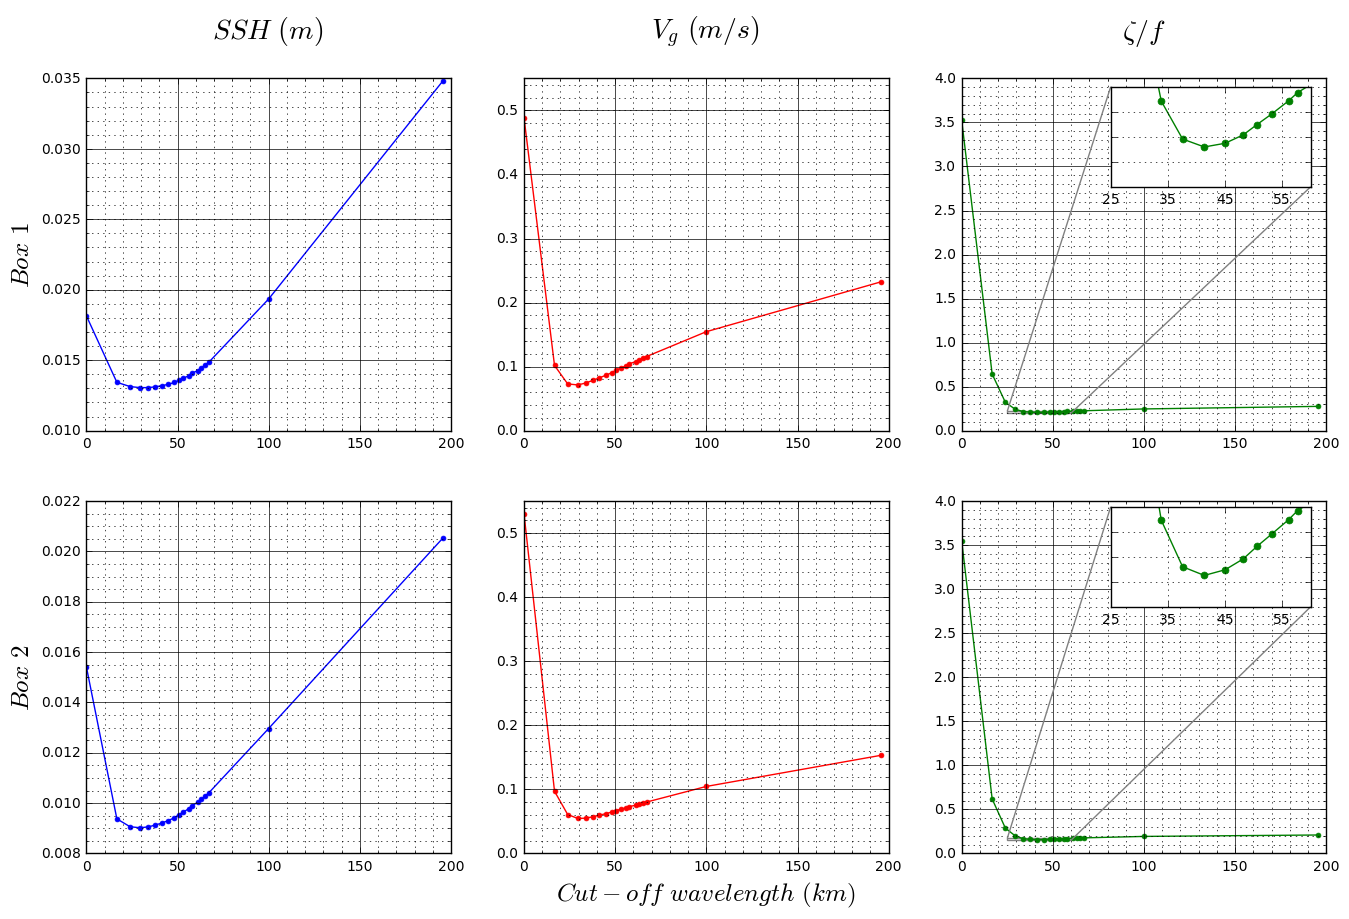

In [33]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.figure(figsize=(16, 10))

gs = gridspec.GridSpec(2, 3)

ax_s_u = plt.subplot(gs[0,0])
plt.plot(wave_lengths, rmseR_sshp1_1ref_b1, 'b.-', markersize=7)
plt.ylabel('$Box$ $1$', size=18)
plt.title('$SSH$ $(m)$ \n', size=20)
grid(b=True, which='major', linestyle='-') 
ax_s_u.minorticks_on()
grid(b=True, which='minor', linestyle=':') 

ax_s_b = plt.subplot(gs[1,0])
plt.plot(wave_lengths, rmseR_sshp1_1ref_b2, 'b.-', markersize=7)
plt.ylabel('$Box$ $2$', size=18)
grid(b=True, which='major', linestyle='-') 
ax_s_b.minorticks_on()
grid(b=True, which='minor', linestyle=':') 

ax_v_u = plt.subplot(gs[0,1])
plt.plot(wave_lengths, rmseR_vel_b1, 'r.-', markersize=7)
plt.title('$V_g$ $(m/s)$ \n', size=20)
grid(b=True, which='major', linestyle='-') 
ax_v_u.minorticks_on()
grid(b=True, which='minor', linestyle=':') 
ax_v_u.set_ylim([0, 0.55])

ax_v_b = plt.subplot(gs[1,1])
plt.plot(wave_lengths, rmseR_vel_b2, 'r.-', markersize=7)
grid(b=True, which='major', linestyle='-') 
ax_v_b.minorticks_on()
grid(b=True, which='minor', linestyle=':') 
ax_v_b.set_ylim([0, 0.55])

plt.xlabel('$Cut-off$ $wavelength$ $(km)$', size=18)

ax_r_u = plt.subplot(gs[0,2])
plt.plot(wave_lengths, rmse_vor_b1, 'g.-', markersize=7)
plt.title('$\zeta/f$ \n', size=20)
grid(b=True, which='major', linestyle='-') 
ax_r_u.minorticks_on()
grid(b=True, which='minor', linestyle=':') 

#################### ZOOM:

axins_r_u = inset_axes(ax_r_u, 2,1 , loc=2, bbox_to_anchor=(0.76, 0.9), bbox_transform=ax_r_u.figure.transFigure) # no zoom) # zoom-factor: 2.5, location: upper-left

axins_r_u.plot(wave_lengths, rmse_vor_b1, 'g.-', markersize=10)

x1, x2, y1, y2 = 25, 60, .2, .22 # specify the limits
axins_r_u.set_xlim(x1, x2) # apply the x-limits
axins_r_u.set_ylim(y1, y2) # apply the y-limits
axins_r_u.grid()
axins_r_u.xaxis.set_ticks(np.arange(25., 65., 10.))

plt.yticks(visible=False)

mark_inset(ax_r_u, axins_r_u, loc1=2, loc2=4, fc="none", ec="0.5")

####################

ax_r_b = plt.subplot(gs[1,2])
plt.plot(wave_lengths, rmse_vor_b2, 'g.-', markersize=7)
grid(b=True, which='major', linestyle='-') 
ax_r_b.minorticks_on()
grid(b=True, which='minor', linestyle=':') 

##################### ZOOM:

axins_r_b = inset_axes(ax_r_b, 2,1 , loc=2, bbox_to_anchor=(0.76, 0.48), bbox_transform=ax_r_b.figure.transFigure) # no zoom

axins_r_b.plot(wave_lengths, rmse_vor_b2, 'g.-', markersize=10)

x1, x2, y1, y2 = 25, 60, .15, .17 # specify the limits
axins_r_b.set_xlim(x1, x2) # apply the x-limits
axins_r_b.set_ylim(y1, y2) # apply the y-limits
axins_r_b.grid()
axins_r_b.xaxis.set_ticks(np.arange(25., 65., 10.))

plt.yticks(visible=False)

mark_inset(ax_r_b, axins_r_b, loc1=2, loc2=4, fc="none", ec="0.5")

####################

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'rmse' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=300)
    
plt.show()


# Stats:

# Minimum point:
# -ssh: 30 
# -vel: 20-30 
# -vort: 35 - 37

In [34]:
print 'SSH'
print 'Wavelength: ' + str(wave_lengths[np.where(rmseR_sshp1_1ref_b1==rmseR_sshp1_1ref_b1.min())[0][0]])
print 'Min. RMSE: ' + str(rmseR_sshp1_1ref_b1.min())
print 'vel'
print 'Wavelength: ' + str(wave_lengths[np.where(rmseR_vel_b1==rmseR_vel_b1.min())[0][0]])
print 'Min. RMSE: ' + str(rmseR_vel_b1.min())
print 'vort'
print 'Wavelength: ' + str(wave_lengths[np.where(rmse_vor_b1==rmse_vor_b1.min())[0][0]])
print 'Min. RMSE: ' + str(rmse_vor_b1.min())

SSH
Wavelength: 29.47
Min. RMSE: 0.0130548123138
vel
Wavelength: 29.47
Min. RMSE: 0.0714380279335
vort
Wavelength: 41.38
Min. RMSE: 0.207956381521


In [35]:
print 'SSH'
print 'Wavelength: ' + str(wave_lengths[np.where(rmseR_sshp1_1ref_b2==rmseR_sshp1_1ref_b2.min())[0][0]])
print 'Min. RMSE: ' + str(rmseR_sshp1_1ref_b2.min())
print 'vel'
print 'Wavelength: ' + str(wave_lengths[np.where(rmseR_vel_b2==rmseR_vel_b2.min())[0][0]])
print 'Min. RMSE: ' + str(rmseR_vel_b2.min())
print 'vort'
print 'Wavelength: ' + str(wave_lengths[np.where(rmse_vor_b2==rmse_vor_b2.min())[0][0]])
print 'Min. RMSE: ' + str(rmse_vor_b2.min())

SSH
Wavelength: 29.47
Min. RMSE: 0.00901968308207
vel
Wavelength: 29.47
Min. RMSE: 0.0546229048181
vort
Wavelength: 41.38
Min. RMSE: 0.156266326856
